In [546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torch
import torch.nn.functional as F
import torch.nn as nn

import shap


from captum.attr import IntegratedGradients

ModuleNotFoundError: No module named 'vit_grad_rollout'

In [440]:
train = np.genfromtxt("mnist_train.csv", delimiter = ",", skip_header = 1, dtype=int)/255

# train_y = onehot(train[:,0]*255)
train_y = (train[:,0]*255).astype(int)

train = train[train_y == 0 | (train_y == 1).astype(int)]
train_y = train_y[train_y == 0 | (train_y == 1).astype(int)]

In [442]:
train_y = torch.tensor(train_y, dtype= torch.long)

In [443]:
train_dat = torch.Tensor(train)

In [598]:
batch_size = 32

In [612]:
def onehot(l):
    one = torch.zeros((l.shape[0],10))

    for i, o in enumerate(l):
        one[i,int(o)] = 1

    return one


def loader(data, data_y, batch_size):
    for i in range(len(data)//batch_size):
        x, y = data[i*batch_size:(i+1)*batch_size,1:], data_y[i*batch_size:(i+1)*batch_size]
        yield x, y


train_loader = loader(train_dat, train_y, batch_size)


In [613]:
class nemt(nn.Module):
    def __init__(self):
        super(nemt, self).__init__()
        self.get_res = False
        self.conv = nn.Conv2d(1, 2, kernel_size=5)
        self.pool = nn.MaxPool2d(2)
        # self.fc1 = nn.Linear(288, 64)
        self.fc1 = lambda x: x
        self.fc2 = lambda x: x
        # self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(288, 2)

    def forward(self, x):
        x = self.conv(x.view(-1,28,28).unsqueeze(1))
        if self.get_res:
            return x
        x = self.pool(x)
        # print(x.shape)
        x = F.relu(self.fc1(x.reshape(-1,288)))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = nemt()


In [614]:
loss_fn = nn.CrossEntropyLoss()

def train(model, n_epochs):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-5)

    for i in range(n_epochs):
        train_loader = loader(train_dat, train_y, batch_size)

        running_loss = 0.0
        running_acc = 0.0
        c = 0
        for X, y in tqdm(train_loader, total = len(train_y)//batch_size):
            pred = model(X)
            loss = loss_fn(pred, y)

            acc = (pred.argmax(1) == y).detach().float().mean()

            running_loss += loss.detach().numpy()
            running_acc += acc

            loss.backward()
            optimizer.step()
            c += 1
        print(running_loss/c, running_acc/c)

train(model, 50)

  0%|          | 0/395 [00:00<?, ?it/s]

0.6523789598971983 tensor(0.5043)


  0%|          | 0/395 [00:00<?, ?it/s]

0.5755791730518582 tensor(0.7150)


  0%|          | 0/395 [00:00<?, ?it/s]

0.49313929080963137 tensor(0.9502)


  0%|          | 0/395 [00:00<?, ?it/s]

0.4111605370346504 tensor(0.9830)


  0%|          | 0/395 [00:00<?, ?it/s]

0.3347386017253127 tensor(0.9874)


  0%|          | 0/395 [00:00<?, ?it/s]

0.2670672822224943 tensor(0.9894)


  0%|          | 0/395 [00:00<?, ?it/s]

0.21062047134471845 tensor(0.9894)


  0%|          | 0/395 [00:00<?, ?it/s]

0.16544174572712259 tensor(0.9899)


  0%|          | 0/395 [00:00<?, ?it/s]

0.13033741906851154 tensor(0.9902)


  0%|          | 0/395 [00:00<?, ?it/s]

0.10357163204233857 tensor(0.9903)


  0%|          | 0/395 [00:00<?, ?it/s]

0.0825748544044887 tensor(0.9903)


  0%|          | 0/395 [00:00<?, ?it/s]

0.06670326210464103 tensor(0.9901)


  0%|          | 0/395 [00:00<?, ?it/s]

0.054647982118156135 tensor(0.9906)


  0%|          | 0/395 [00:00<?, ?it/s]

0.04534792726199272 tensor(0.9906)


  0%|          | 0/395 [00:00<?, ?it/s]

0.03812285877787803 tensor(0.9909)


  0%|          | 0/395 [00:00<?, ?it/s]

0.032456243347635944 tensor(0.9921)


  0%|          | 0/395 [00:00<?, ?it/s]

0.027993714256813348 tensor(0.9926)


  0%|          | 0/395 [00:00<?, ?it/s]

0.024503274715234395 tensor(0.9929)


  0%|          | 0/395 [00:00<?, ?it/s]

0.021866820871099077 tensor(0.9932)


  0%|          | 0/395 [00:00<?, ?it/s]

0.019829758753723028 tensor(0.9936)


  0%|          | 0/395 [00:00<?, ?it/s]

0.01826406487918023 tensor(0.9937)


  0%|          | 0/395 [00:00<?, ?it/s]

0.01706783479725046 tensor(0.9937)


  0%|          | 0/395 [00:00<?, ?it/s]

0.016159414808130292 tensor(0.9938)


  0%|          | 0/395 [00:00<?, ?it/s]

0.015470931331072257 tensor(0.9941)


  0%|          | 0/395 [00:00<?, ?it/s]

0.014950124376591241 tensor(0.9942)


  0%|          | 0/395 [00:00<?, ?it/s]

0.014555120001446833 tensor(0.9945)


  0%|          | 0/395 [00:00<?, ?it/s]

0.01424501593163181 tensor(0.9947)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013994409297599385 tensor(0.9949)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013793006661203262 tensor(0.9950)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013639589200187102 tensor(0.9949)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013527686647800774 tensor(0.9949)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013445505158754518 tensor(0.9952)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013382272488608946 tensor(0.9953)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013334540395000134 tensor(0.9955)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013301251341857922 tensor(0.9956)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013281648286019816 tensor(0.9957)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013273838697136565 tensor(0.9960)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013278914481635947 tensor(0.9961)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013297078993821189 tensor(0.9962)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013329474793474272 tensor(0.9962)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013371173855692949 tensor(0.9964)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013420817618547139 tensor(0.9964)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013476419289743675 tensor(0.9964)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013538938297767656 tensor(0.9964)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013608776242671098 tensor(0.9964)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013686050566894618 tensor(0.9964)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013770560802350342 tensor(0.9965)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013862368179918812 tensor(0.9965)


  0%|          | 0/395 [00:00<?, ?it/s]

0.013959306468664317 tensor(0.9965)


  0%|          | 0/395 [00:00<?, ?it/s]

0.014057716101912199 tensor(0.9965)


In [615]:
i = 4

X, y = train_dat[i,1:].unsqueeze(0), train_y[i].unsqueeze(0)
pred_label = model(X)

print(y, pred_label.argmax())

tensor([1]) tensor(1)


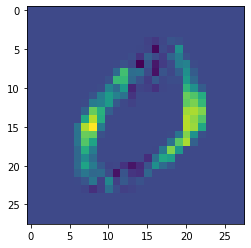

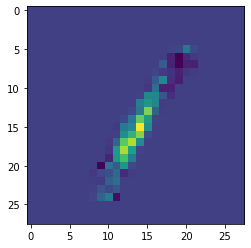

In [616]:
from captum.attr import visualization as viz
from captum.attr import IntegratedGradients
import torchvision

# model = torchvision.models.resnet18(pretrained=True)
# model = model.eval()


for i in range(2):
    # i = 1

    X, y = train_dat[i,1:].unsqueeze(0), train_y[i].unsqueeze(0)
    pred_label = model(X)

    # print(pred_label.shape, X.shape)
    # print(torch.argmax(pred_label), y)
    integrated_gradients = IntegratedGradients(model)

    attributions_ig = integrated_gradients.attribute(X, target=torch.argmax(pred_label))

    v = attributions_ig.squeeze(0).view(28,28).cpu().detach().numpy()
    plt.imshow(v)
    plt.show()
# plt.imshow(v + X.view(28,28).cpu().detach().numpy())
# viz.visualize_image_attr(v,
#                             torch.argmax(y),
#                             method='heat_map',)
#                             # show_colorbar=True,)
# #                             # sign='positive',)
# #                             # outlier_perc=1)

In [617]:
# params = next(model.parameters()).detach().view(-1,28,28)

# for p in params:
#     plt.imshow(p)
#     plt.show()
N = 200
test_images = train_dat[N:N+2,1:]
bgr = train_dat[:N,1:]

e = shap.DeepExplainer(model, bgr)
shap_values = e.shap_values(test_images)


In [618]:
train_loader = loader(train_dat, train_y, batch_size)

for X, y in train_loader:

    print(model(X).argmax(1),"\n", y)

    print((model(X).argmax(1) == y).detach().float().mean())
    break

tensor([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 1]) 
 tensor([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 1])
tensor(1.)


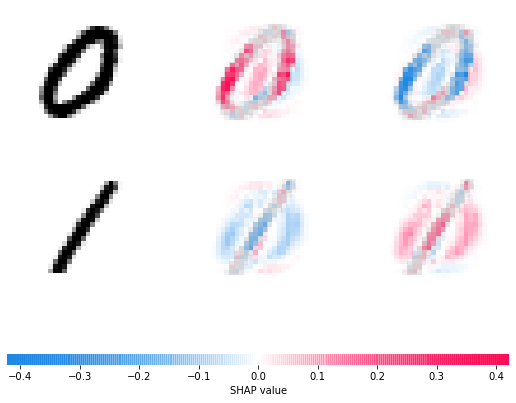

In [619]:
shap_numpy = [np.array(s.reshape(-1,28,28)) for s in shap_values]
test_numpy = test_images.numpy().reshape(-1,28,28)

shap.image_plot(shap_numpy, -test_numpy)

Parameter containing:
tensor([[[[ 0.0298,  0.1045,  0.0260,  0.2951,  0.3575],
          [ 0.3072,  0.3736,  0.3039,  0.3326,  0.1132],
          [ 0.3995,  0.2887,  0.3217,  0.0346, -0.0053],
          [ 0.2483,  0.3085,  0.1566,  0.1137, -0.2211],
          [ 0.3624,  0.2995,  0.1914,  0.3652, -0.4070]]],


        [[[ 0.0931,  0.2891,  0.1315,  0.0851,  0.0837],
          [ 0.3436,  0.2416,  0.3914,  0.3140,  0.3167],
          [ 0.1674,  0.2055,  0.0721,  0.3735,  0.2259],
          [ 0.0926,  0.1609, -0.1033, -0.2345,  0.2153],
          [ 0.1139, -0.0112, -0.1351, -0.2526,  0.0237]]]], requires_grad=True)


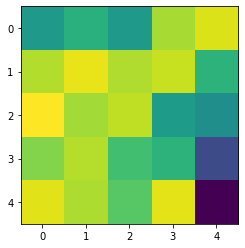

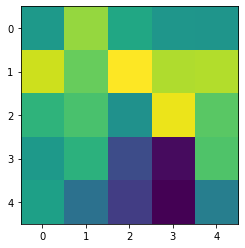

In [620]:
p = model.parameters()
c = next(p)
print(c)
for i in range(2):
    plt.imshow(c[i][0].detach().numpy())
    plt.show()


In [621]:
model.get_res = True

1.2977437


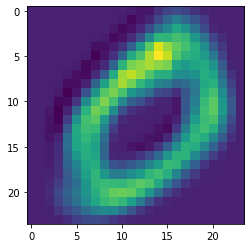

0.8020725


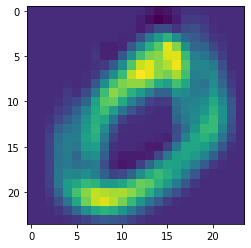

0.8471985


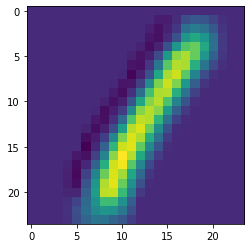

0.4943539


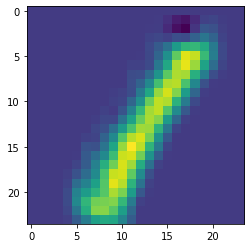

0.8673691


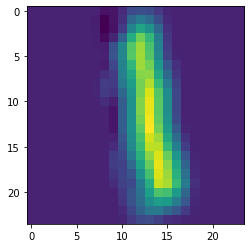

0.5087068


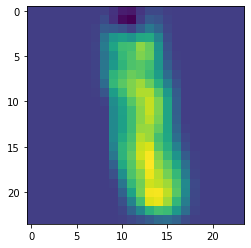

0.64840394


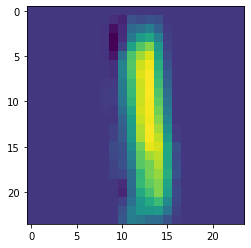

0.35909182


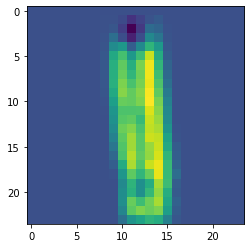

In [625]:
t = train_dat[:32,1:] 
# t = torch.Tensor(np.random.random((32,28*28)))
for k in range(4):
    res = model(t)[k]

    for i in range(2):
        plt.imshow(res[i].detach().numpy())
        print(np.mean(res[i].detach().numpy()))
        plt.show()